<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Prophet_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [2]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/yeesem/Time-Series-Data-Analysis/main/airline_passengers.csv",index_col = 'Month',parse_dates = True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.columns = ['y']

In [10]:
df['ds'] = df.index

In [11]:
df.head()

,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


In [12]:
df.tail()

,y,ds
Month,,
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01
1960-11-01,390,1960-11-01
1960-12-01,432,1960-12-01


In [13]:
m = Prophet()

In [14]:
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/rmhspxz2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/ypfjexs6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48501', 'data', 'file=/tmp/tmp9c22c4x2/rmhspxz2.json', 'init=/tmp/tmp9c22c4x2/ypfjexs6.json', 'output', 'file=/tmp/tmp9c22c4x2/prophet_modelb51v81zy/prophet_model-20231130133219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
future = m.make_future_dataframe(periods=12,freq = 'MS')

In [16]:
future.tail()

,ds
151,1961-08-01
152,1961-09-01
153,1961-10-01
154,1961-11-01
155,1961-12-01


In [17]:
forecast = m.predict(future)

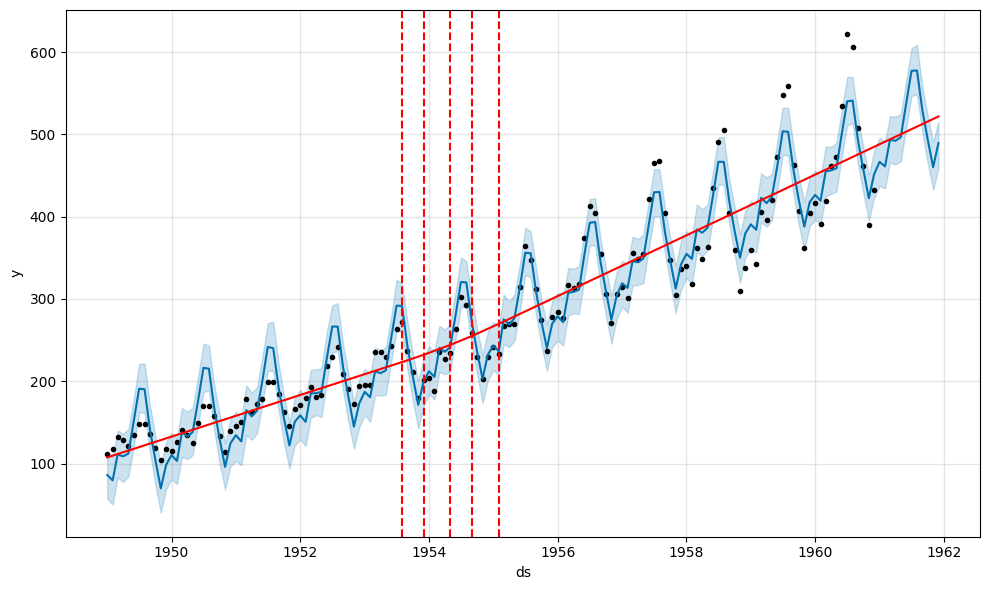

In [18]:
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(),m,forecast)

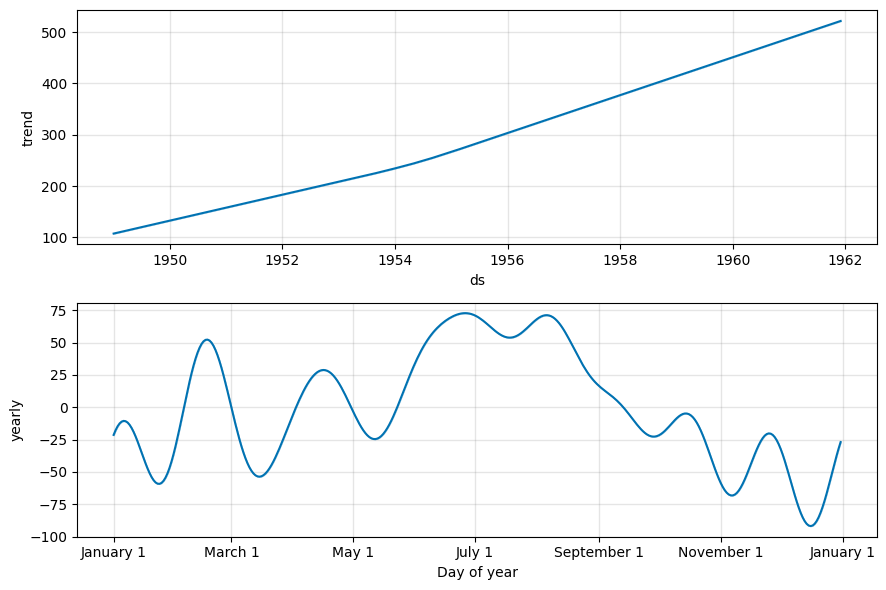

In [19]:
m.plot_components(forecast);

In [20]:
m2 = Prophet(seasonality_mode = 'multiplicative')

In [21]:
m2.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/0m0q3mbo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/a_mi1xpt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70655', 'data', 'file=/tmp/tmp9c22c4x2/0m0q3mbo.json', 'init=/tmp/tmp9c22c4x2/a_mi1xpt.json', 'output', 'file=/tmp/tmp9c22c4x2/prophet_model90s1kkkm/prophet_model-20231130135431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:54:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future = m2.make_future_dataframe(periods = 12,freq = 'MS')

In [23]:
forecast = m2.predict(future)

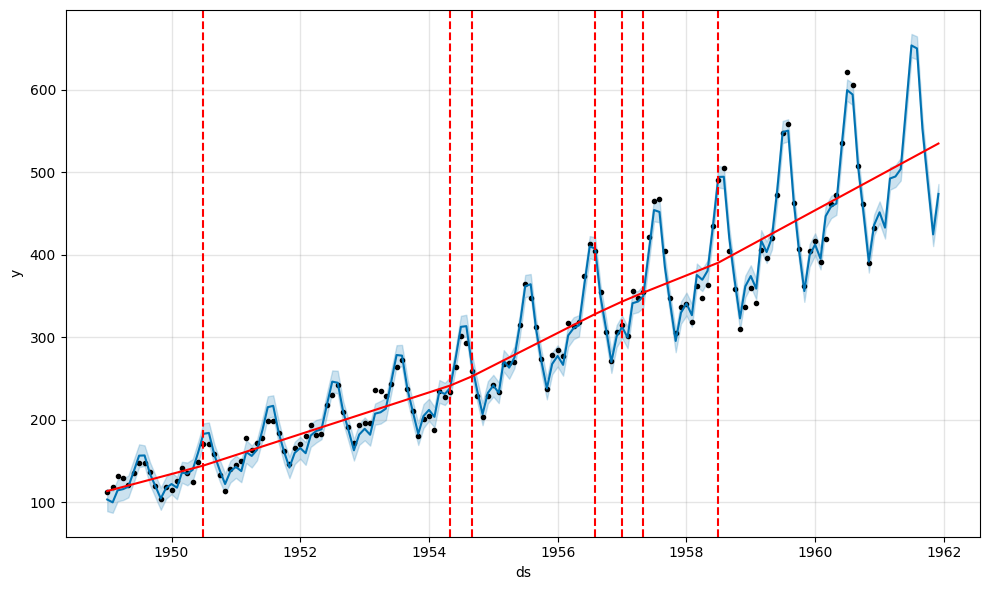

In [24]:
fig = m2.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m2,forecast)

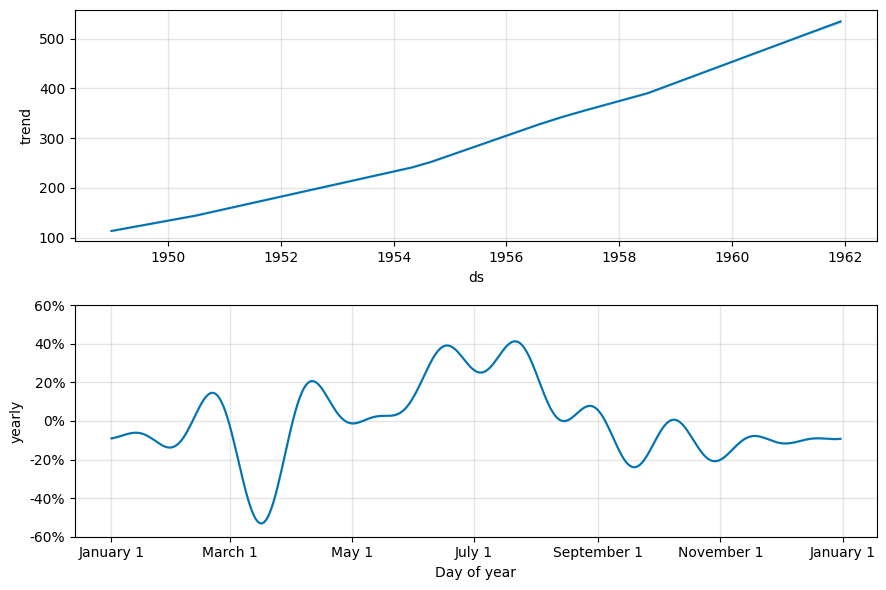

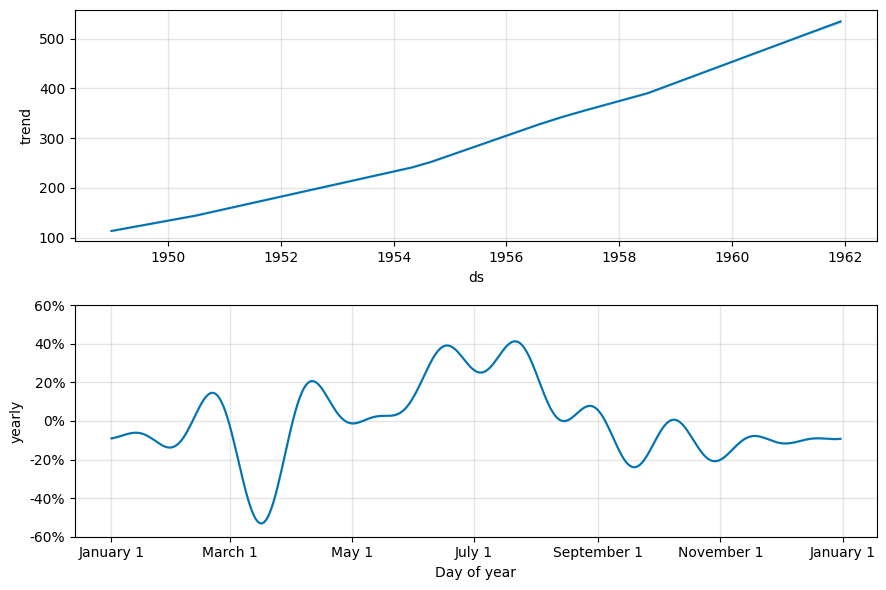

In [26]:
m2.plot_components(forecast)

In [27]:
#Another way to prevent multiplicative is to log the data
logdf = df.copy()
logdf['y'] = np.log(logdf['y'])

In [28]:
m3 = Prophet()

In [29]:
m3.fit(logdf)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/jvcl73cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/b695zr2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69190', 'data', 'file=/tmp/tmp9c22c4x2/jvcl73cx.json', 'init=/tmp/tmp9c22c4x2/b695zr2b.json', 'output', 'file=/tmp/tmp9c22c4x2/prophet_modelimqh1ftz/prophet_model-20231130140742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future = m3.make_future_dataframe(periods = 12,freq = 'MS')

In [31]:
forecast = m3.predict(future)

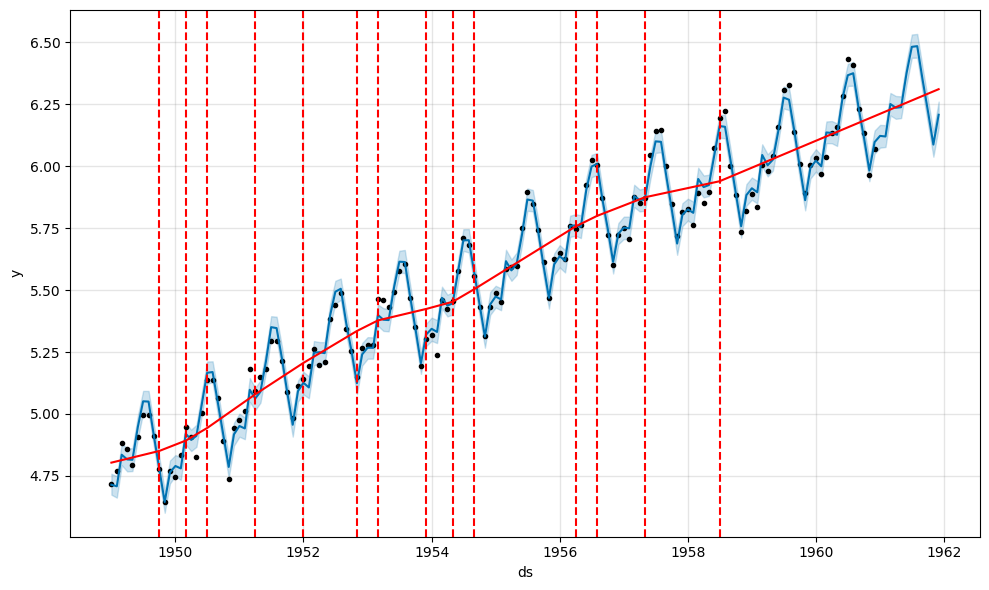

In [32]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(),m3,forecast)

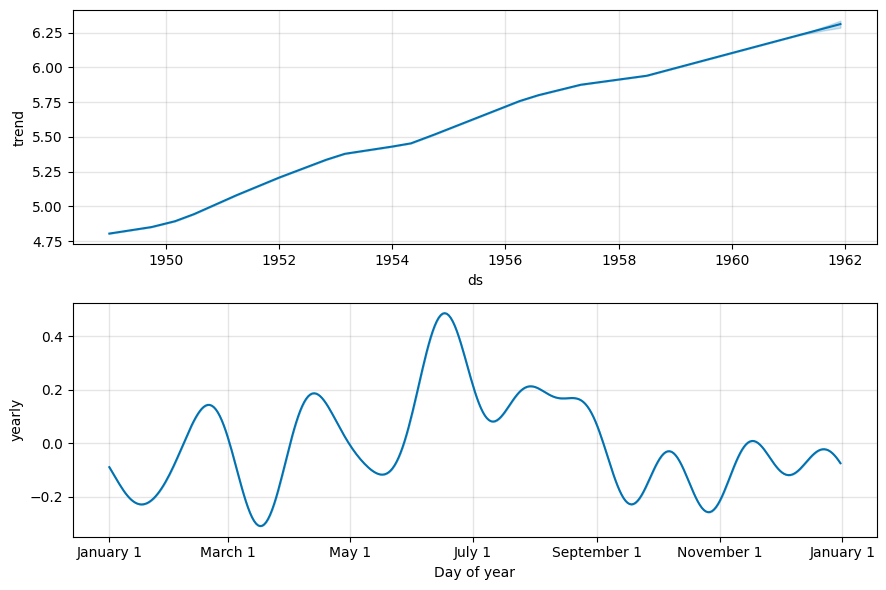

In [33]:
m3.plot_components(forecast);

# **Outliers**

In [34]:
#Set outliers
df.loc['1955-01-01','y'] = 600
df.loc['1957-06-01','y'] = 1

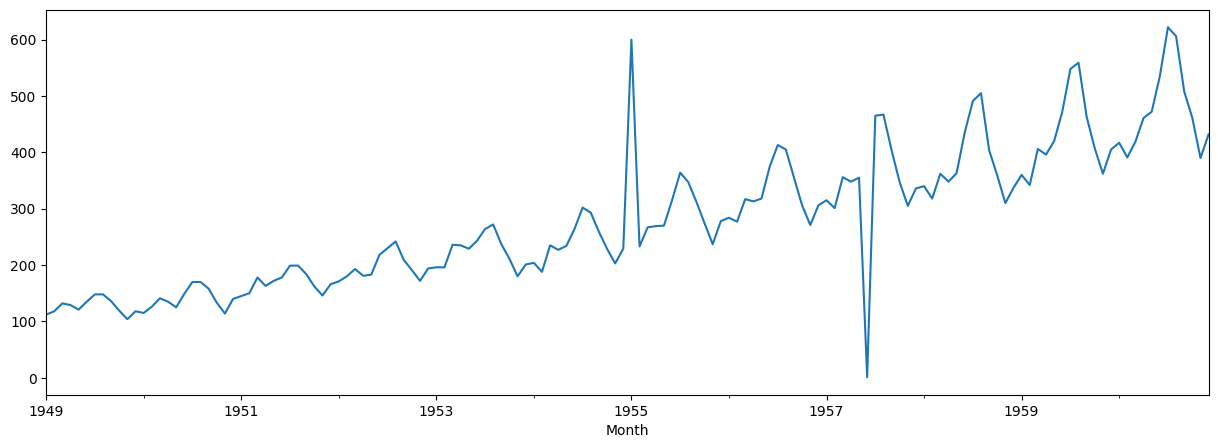

In [36]:
df['y'].plot(figsize = (15,5));

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/vktc90d2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/3cqa8uic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86739', 'data', 'file=/tmp/tmp9c22c4x2/vktc90d2.json', 'init=/tmp/tmp9c22c4x2/3cqa8uic.json', 'output', 'file=/tmp/tmp9c22c4x2/prophet_modelppgxptje/prophet_model-20231130141526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


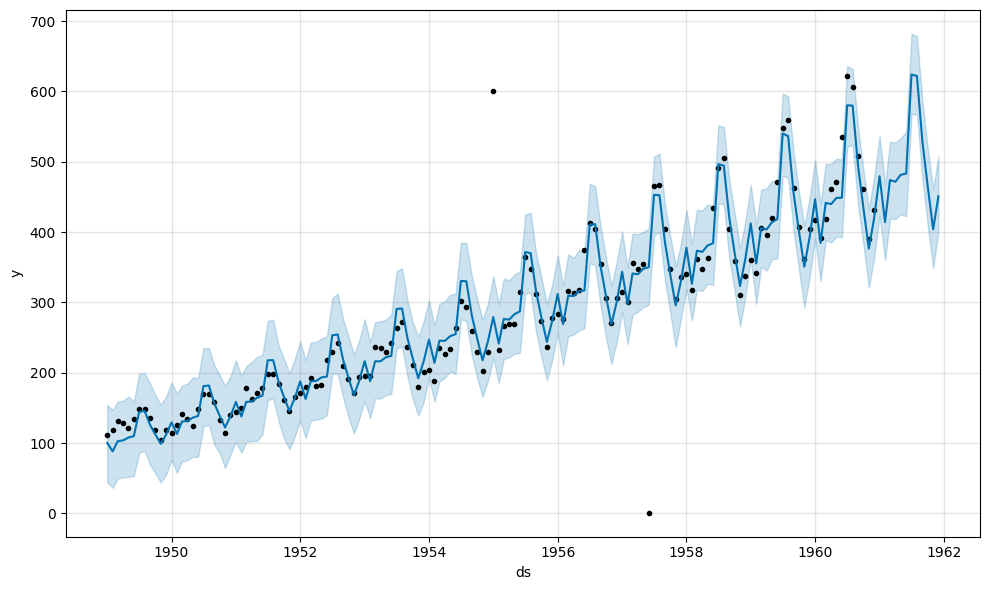

In [37]:
m = Prophet(seasonality_mode = 'multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods = 12,freq = 'MS')
forecast = m.predict(future)
m.plot(forecast);
#The prediction interval becomes larger compared to previous graph

In [38]:
#Create a new dataframe does not contain outlier
df2 = df[~df.index.isin(['1955-01-01','1957-06-01'])]

In [39]:
df2.head()

,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


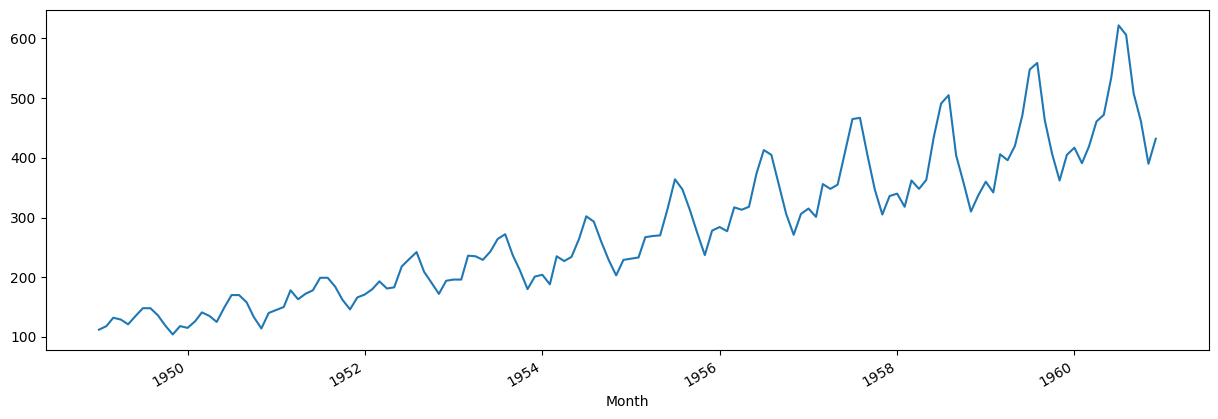

In [40]:
df2['y'].plot(figsize = (15,5));

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/1eaucjib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c22c4x2/db7nkaf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92461', 'data', 'file=/tmp/tmp9c22c4x2/1eaucjib.json', 'init=/tmp/tmp9c22c4x2/db7nkaf1.json', 'output', 'file=/tmp/tmp9c22c4x2/prophet_model8g5urs76/prophet_model-20231130142007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


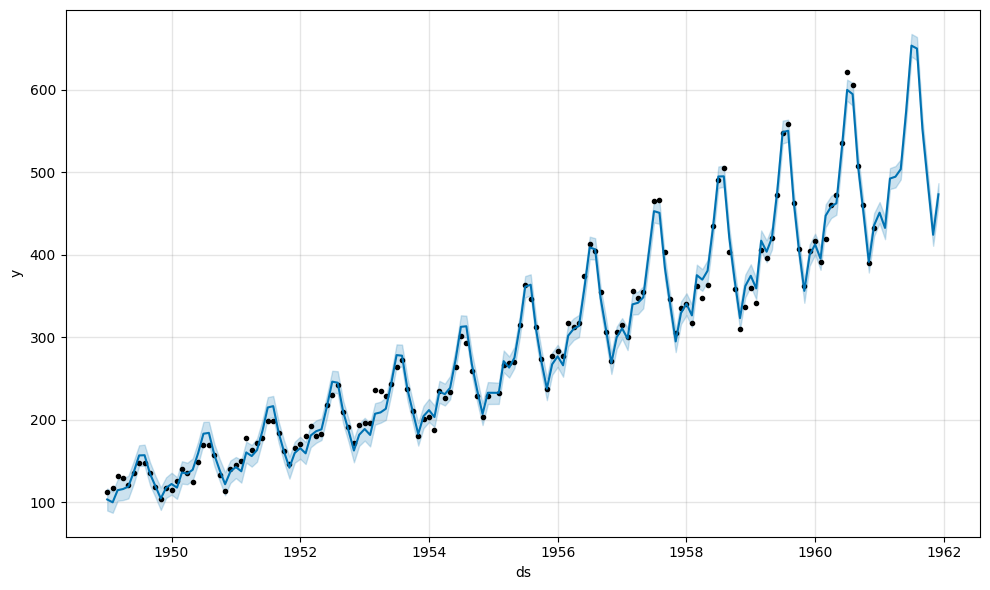

In [41]:
m = Prophet(seasonality_mode = 'multiplicative')
m.fit(df2)
future = m.make_future_dataframe(periods = 12,freq = 'MS')
forecast = m.predict(future)
m.plot(forecast);